<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR_Assignments/blob/main/Assignment_16b_sentimental_analysis_Elon_Musk_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Mining**

**Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib.pyplot import imread
import string
import spacy
from wordcloud import WordCloud
#%matplotlib inline

In [ ]:
# Read the data
tweet_data = pd.read_csv('Elon_musk.csv',encoding="latin-1")

# remove both the leading and the trailing characters
tweet_data= [Text.strip() for Text in tweet_data.Text]

# removing empty strings
tweet_data = [x for x in tweet_data if x]
tweet_data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
Tweet_wordcloud = ' '.join(tweet_data)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenizing based on sentences (wherever fullstop considers new sentence)
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweet_data))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
# Converting tokenized sentences into Dataframe
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
# Stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
sent_df['no_stop_sentence'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [ ]:
sent_df

,sentence,no_stop_sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t...."
921,Details Aug 28.,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [ ]:
#removing punctuations
sent_df['clean'] = sent_df['no_stop_sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [ ]:
sent_df

,sentence,no_stop_sentence,clean
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t....","It may never pay out, stock cant b https://t...."
921,Details Aug 28.,Details Aug 28.,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [ ]:
sent_df=sent_df.drop(['sentence','no_stop_sentence'],axis=1)

In [ ]:
sent_df

,clean
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!
...,...
919,"@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, stock cant b https://t...."
921,Details Aug 28.
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
affinity_scores

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, but calculate the score for the whole sentence.

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [ ]:
sent_df

,clean,sentiment_value
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0
1,Have tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge underestimated @teslacn Congratu...,3
4,Now next even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0
920,"It may never pay out, stock cant b https://t....",-4
921,Details Aug 28.,0
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2


In [ ]:
#word count for "clean"column
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     3
2     4
3    11
4     4
5     4
6     9
7    10
8     6
9    74
Name: word_count, dtype: int64

In [ ]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,-8,41
64,"Also, road hell mostly paved bad intentions.",-7,7
920,"It may never pay out, stock cant b https://t....",-4,21
680,"Occasional flights land ok, frequent (daily) f...",-4,26
611,"Then static fire, checkouts, static fire, fly ...",-4,11
923,@TeslaGong @PPathole Samwise Gamgee @PPathole ...,-3,13
630,You modern day moron.,-3,4
380,No problem theres way get current design Cybe...,-3,10
296,"No symptoms past days, apart fatigue.",-3,6
816,"Connector damaged storm, fixed now.",-3,5


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.532468
std        2.761762
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,clean,sentiment_value,word_count
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9
1,Have tried it?,0,3
4,Now next even more!!,0,4
5,Happy New Year Ox!,0,4
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",-2,9


In [ ]:
sent_df[sent_df['sentiment_value']>=10].head()

,clean,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, engi...",16,171
42,"@thejackbeyer @NASASpaceflight Cryoproof, inst...",12,66
81,@teslaownersSV This good one @MrBeastYT I whis...,13,30
105,@Erdayastronaut @SpaceX Was also thinking Spac...,16,66
159,@harsimranbansal @heydave7 It likely make sens...,11,68


In [ ]:
sent_df['index']=range(0,len(sent_df))

In [ ]:
sent_df

,clean,sentiment_value,word_count,index
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0,7,919
920,"It may never pay out, stock cant b https://t....",-4,21,920
921,Details Aug 28.,0,3,921
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29,922


# WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

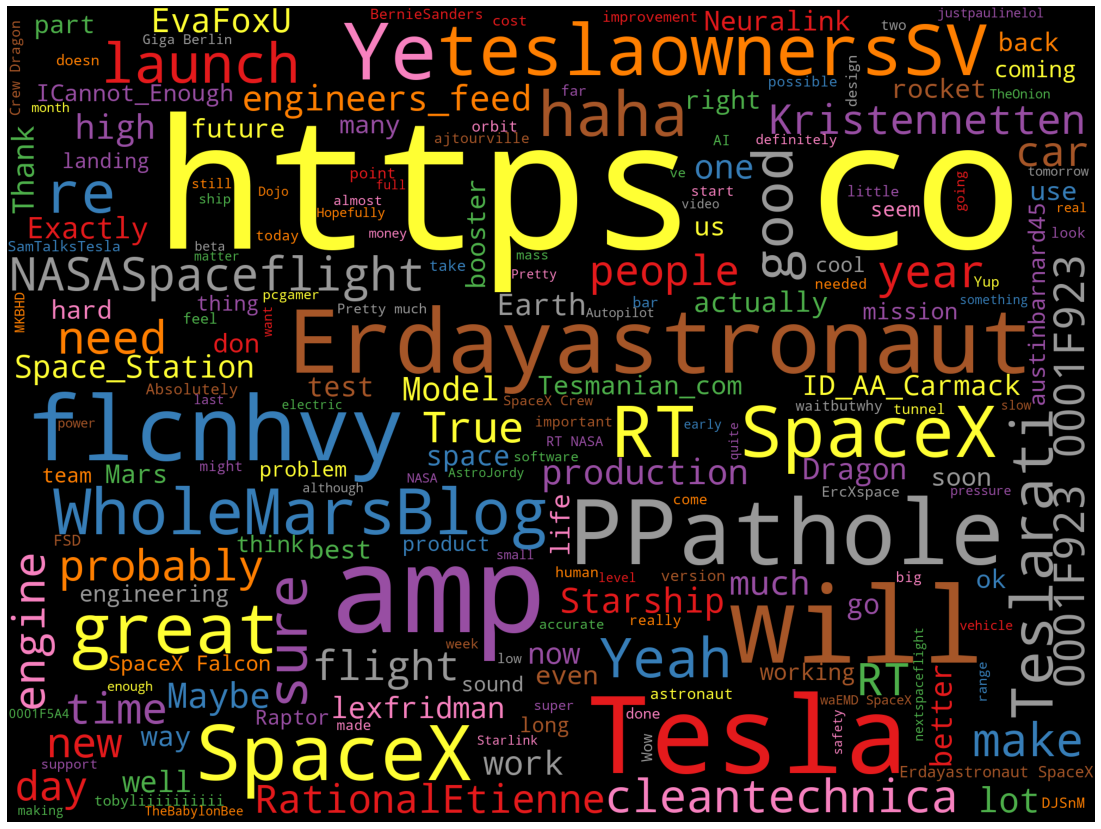

In [ ]:
stopwords = STOPWORDS
wordcloud = WordCloud(width =2000, height = 1500,background_color='black',colormap='Set1',stopwords=stopwords).generate(Tweet_wordcloud)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off');

# Visualization of sentiment scores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


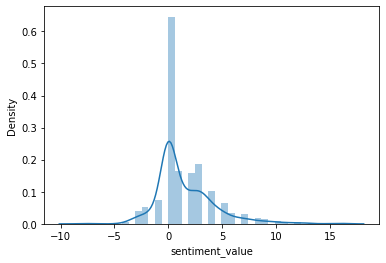

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution plot
sns.distplot(sent_df['sentiment_value']);

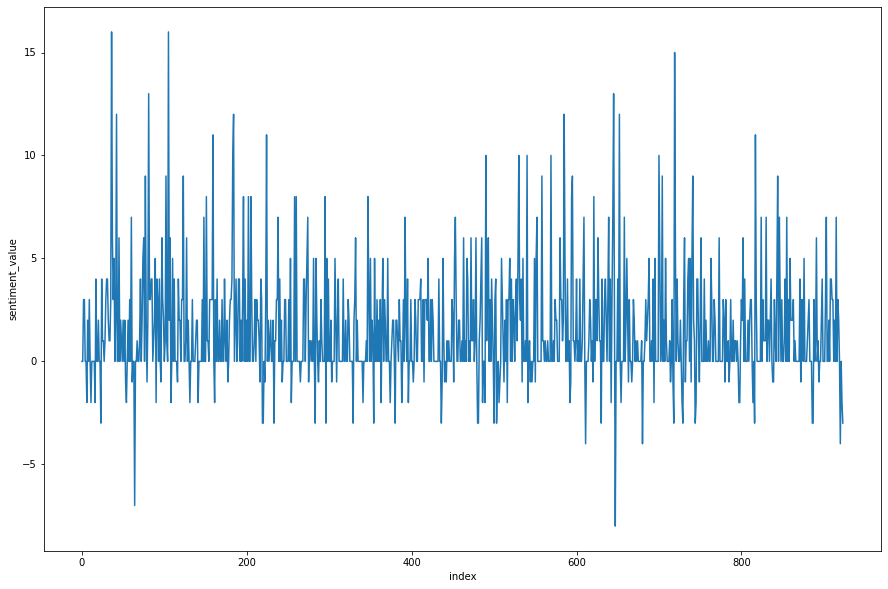

In [ ]:
#Line plot
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

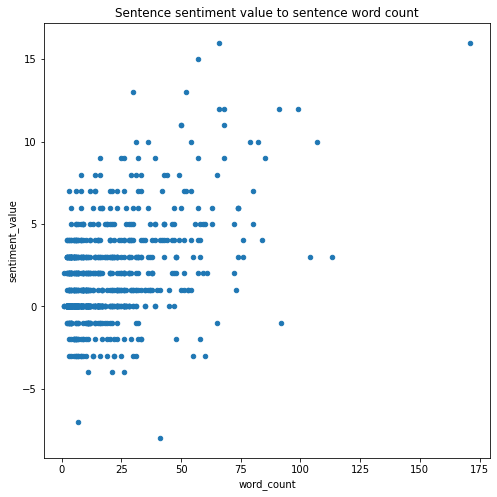

In [ ]:
#Scatter plot between 'Sentiment value' and 'word count'
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');

**Inference : Based on above Sentiment analysis, we can conclude that positive tweets are more as compared to negative.**